# <font color = pink> A. Read Configuration </font>

## <font color = grey><b>Read Configuration from JSON file</b></font>

<font color = magenta>
    <b>import json</b> <br>
    <b>json.load (filename)</b> <br>
    returns a dictionary
</font>

In [365]:
import json
class Config:
    def __init__ (self, config_file = 'config.json'):
        with open (config_file, 'r') as f:
            self.config = json.load (f)

    def get_property (self, property_name):
        return self.config [property_name]
    
config = Config ()

#usage

#config.get_property ('data-folder')
#config.get_property ('train-data-file')
#config.get_property ('test-data-file')

# <font color = orange> B. DataFrame Playground </font>

## <font color = grey><b>1. Read Data from CSV file into a DataFrame</b></font>

**import os** <br>
<font color = magenta>
    <b>os.path.join</b> (dir, filename) <br>
    <b>pd.read_csv</b> (csv_filename, [header = None], names = [col names])
</font>

In [366]:
import os
import pandas as pd

#read data
df_titanic_train = pd.read_csv (os.path.join \
                                (config.get_property ('data-folder'),\
                                 config.get_property ('train-data-file'))\
                               #, header = None
                               )
df_titanic_test = pd.read_csv (os.path.join \
                                (config.get_property ('data-folder'),\
                                 config.get_property ('train-data-file')))

## <font color = grey><b>2. Create DataFrame from Dictionary</b></font>

<font color = magenta>
    pd.DataFrame <b>(dict, columns = , index = )</b>
</font>

In [367]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}

df_raw = pd.DataFrame (raw_data, columns = ['first_name', 'last_name',\
                                           'age', 'preTestScore',\
                                            'postTestScore'])

## <font color = grey><b>3. Save DataFrame to CSV file</b></font>

<font color = magenta>
    <b>df.to_csv</b> (csv_filename)
</font>

In [368]:
df_raw.to_csv (config.get_property ('raw-file'))

## <font color = grey><b>4. DataFrame Statistics</b></font>

### Information

<font color = magenta><b>df.info ()</b><font>

In [369]:
df_raw.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
first_name       5 non-null object
last_name        5 non-null object
age              5 non-null int64
preTestScore     5 non-null object
postTestScore    5 non-null object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


### Information that indicates how many nulls in each column

E.g. 'Age' value is present only for 714 out of 891 rows.
177 rows do not have value. This count can be achieved by using the function <font color = magenta><b>df.isnull().sum()</b></font> as shown further down.

In [370]:
df_titanic_train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Column Names

NOTE: <font color = magenta>columns is an <b>attribute</b></font> that returns an index containing the column names. This attribute can also have a **name**.

In [371]:
df_titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Shape

<font color = magenta><b>df.shape</b></font>

In [373]:
df_raw.shape

(5, 5)

### Display first few rows

<font color = magenta><b>df.head (n)</b></font>

In [374]:
df_raw.head (2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"


### Find 'unique' values of a column

<font color = magenta><b>df[col].unique ()</b></font>

In [375]:
df_titanic_train ['Embarked'].unique ()

array(['S', 'C', 'Q', nan], dtype=object)

### Subtotals, grouped by values of a column

<font color = magenta><b>value_counts ()</b></font> returns a **Series** with <font color = magenta><b>group by values as index values</b></font>.

In [376]:
df_titanic_train ['Survived'].value_counts ()

0    549
1    342
Name: Survived, dtype: int64

NOTE: 'Survived' is used as the field, whose values will be grouped. Hence, the **index is based on the unique values in 'Survived'**.

In [488]:
print(df_titanic_train ['Survived'].value_counts ().index)

Int64Index([0, 1], dtype='int64')


### Extract rows based on a filter

filter = <font color = magenta><b>df [col_filter] == value</b></font> <br>
df <font color = magenta><b>[filter]</b></font>

In [378]:
df_titanic_train [df_titanic_train ['Survived'] == 1].head (2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Subtotals on extracted rows, grouped by values of a column

filter = df [col_filter] == value<br>
df [filter]<font color = magenta><b>[col_groupby].value_counts ()</b></font>

In [379]:
print ('Survived:')
print (df_titanic_train [df_titanic_train \
                  ['Survived'] == 1]['Sex'].value_counts ())
print ('\nDidn''t Survive:')
print (df_titanic_train [df_titanic_train \
                  ['Survived'] == 0]['Sex'].value_counts ())

Survived:
female    233
male      109
Name: Sex, dtype: int64

Didnt Survive:
male      468
female     81
Name: Sex, dtype: int64


**value_counts ()** returns a **Series** with **group by values as index values**.

NOTE: 'Survived' is used as a filter, and 'Sex' is used as the field, whose values will be grouped. Hence, the **index is based on the unique values in 'Sex'**.

In [380]:
type(df_titanic_train [df_titanic_train \
                  ['Survived'] == 0]['Sex'].value_counts ())

pandas.core.series.Series

Series has an **index**

In [381]:
df_titanic_train [df_titanic_train \
                  ['Survived'] == 0]['Sex'].value_counts ().index

Index(['male', 'female'], dtype='object')

### Null count subtotals

visualizing null values inside the dataframe.<br>
df.<font color = magenta><b>isnull ()</b></font>

In [382]:
df_titanic_train.isnull ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


summary of null values
df.isnull ()<font color = magenta><b>.sum ()</b></font>

In [383]:
df_titanic_train.isnull ().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <font color = grey><b>5. Create DataFrame (revisited)</b></font>

### Data creation

#### numpy for NaN
<font color = magenta><b>np.NaN</b></font>

In [384]:
import numpy as np

#### Create some lists

In [679]:
author = ['Strang', 'Blitzstein', 'Witten', 'Bishop', 'Bengio', 'Sutton']
title = ['Introduction to Linear Algebra', 'Introduction to Probability', 'ML Beginner', 'ML Advanced', \
         'Deep Learning', 'Reinforcement Learning - An Introduction']
edition = [1, np.NaN, 2, np.NaN, 1, 2]
cost = [10, 20, 15, 40, 30, 25]
topic = ['Maths', 'Maths', 'Machine Learning', 'Machine Learning', \
         'Machine Learning', 'Machine Learning']
sub_topic = ['LA', 'Prob', 'ML', 'ML', 'DL', 'RL']

#### Create some Series
<font color = magenta><b>pd.Series (list)</b></font>

In [680]:
s_author = pd.Series (author)
s_title = pd.Series (title)
s_edition = pd.Series (edition)
s_cost = pd.Series (cost)

Series has an index. This series has a **range index** <br>
<font color = magenta><b>Series.index</b></font>

In [387]:
s_author.index

RangeIndex(start=0, stop=6, step=1)

### DataFrame from multiple lists

#### Incorrect way

In [389]:
pd.DataFrame ([author, title])

,0,1,2,3,4,5
0,Strang,Blitzstein,Witten,Bishop,Bengio,Sutton
1,Linear Algebra,Probability,ML Beginner,ML Advanced,Deep Learning,Reinforcement Learning


The reason authors and titles appear on different rows is that a **list is treated as a column**, and we provided a **list of lists**. So, the outer list of 2 elements (author_list and title_list) created the 2 rows, and, the inner list of authors and titles expanded column-wise.

list is treated as a column

In [390]:
pd.DataFrame (['a', 'b'])

,0
0,a
1,b


#### Correct way

Zip and create a **list of tuples**. The elements of the **list** form the rows, and the elements of the **enclosing tuple** form the columns. <br>
pd.DataFrame (<font color = magenta><b>list (zip (lst_1, lst_2)) </b></font>, columns = , index = )

In [391]:
pd.DataFrame (list (zip (author, title)), columns = ['Author', 'Title'])

,Author,Title
0,Strang,Linear Algebra
1,Blitzstein,Probability
2,Witten,ML Beginner
3,Bishop,ML Advanced
4,Bengio,Deep Learning
5,Sutton,Reinforcement Learning


Zip and create a **tuple of tuples**. The elements of the **outer tuple** form the rows, and the elements of the **enclosing tuple** form the columns.

In [392]:
pd.DataFrame (tuple (zip (author, title)), columns = ['Author', 'Title'])

,Author,Title
0,Strang,Linear Algebra
1,Blitzstein,Probability
2,Witten,ML Beginner
3,Bishop,ML Advanced
4,Bengio,Deep Learning
5,Sutton,Reinforcement Learning


### DataFrame from a dictionary, using 'lists' as values of keys

In [518]:
frame = {'Author': author, 'Title': title}
df_temp = pd.DataFrame (frame)
df_temp.head ()

,Author,Title
0,Strang,Introduction to Linear Algebra
1,Blitzstein,Introduction to Probability
2,Witten,ML Beginner
3,Bishop,ML Advanced
4,Bengio,Deep Learning


### DataFrame from a dictionary, using 'Series' as values of keys

In [519]:
frame = {'Author': s_author, 'Title': s_title}
df_books = pd.DataFrame (frame)
df_books.head ()

,Author,Title
0,Strang,Linear Algebra
1,Blitzstein,Probability
2,Witten,ML Beginner
3,Bishop,ML Advanced
4,Bengio,Deep Learning


#### Add a 'Series' externally

NOTE:
- A series can be added externally only if the <font color = magenta><b>index</b></font> of the series <font color = magenta><b>matches</b></font> that of the data frame

In [520]:
df_books ['Edition'] = s_edition
df_books.head ()

,Author,Title,Edition
0,Strang,Linear Algebra,1.0
1,Blitzstein,Probability,NaN
2,Witten,ML Beginner,2.0
3,Bishop,ML Advanced,NaN
4,Bengio,Deep Learning,1.0


## <font color = grey><b>6. Index</b></font>

### Provide 'index'

#### Create a custom index

In [388]:
idx = ['a', 'b', 'c', 'd', 'e', 'f']

#### Pass nameless indices as a parameter

NOTE:
- '<font color = magenta><b>index</b></font>' is the **row index**
- '<font color = magenta><b>columns</b></font>' is the **column index**

In [393]:
df = pd.DataFrame (tuple (zip (author, title)), \
              columns = ['Author', 'Title'], \
             index = idx)
df

,Author,Title
a,Strang,Linear Algebra
b,Blitzstein,Probability
c,Witten,ML Beginner
d,Bishop,ML Advanced
e,Bengio,Deep Learning
f,Sutton,Reinforcement Learning


#### Provide names for indices

use <font color = magenta><b>rename_axis ()</b></font> to rename index names

A **single parameter implies row index**. <br>
rename_axis (<font color = magenta><b>row_index_name</b></font>)

In [394]:
df2 = df.rename_axis ('Sr. No.')
print ('Row Index Name: ', df2.index.name)
print ('Column Index Name: ', df2.columns.name)
df2

Row Index Name:  Sr. No.
Column Index Name:  None


,Author,Title
Sr. No.,,
a,Strang,Linear Algebra
b,Blitzstein,Probability
c,Witten,ML Beginner
d,Bishop,ML Advanced
e,Bengio,Deep Learning
f,Sutton,Reinforcement Learning


Use **axis** to indicate row (= 0) or column (= 1) axis <br>
rename_axis (<font color = magenta><b>col_axis_name, axis = 1</b></font>)

In [395]:
df2 = df.rename_axis ('Attributes->', axis = 1)
print ('Row Index Name: ', df2.index.name)
print ('Column Index Name: ', df2.columns.name)
df2

Row Index Name:  None
Column Index Name:  Attributes->


Attributes->,Author,Title
a,Strang,Linear Algebra
b,Blitzstein,Probability
c,Witten,ML Beginner
d,Bishop,ML Advanced
e,Bengio,Deep Learning
f,Sutton,Reinforcement Learning


'axis' values <font color = magenta><b>0 and 1</b></font> also carry names "rows" and "columns" respectively.

In [396]:
df2 = df.rename_axis ('Attributes->', axis = "columns")
print ('Row Index Name: ', df2.index.name)
print ('Column Index Name: ', df2.columns.name)
df2

Row Index Name:  None
Column Index Name:  Attributes->


Attributes->,Author,Title
a,Strang,Linear Algebra
b,Blitzstein,Probability
c,Witten,ML Beginner
d,Bishop,ML Advanced
e,Bengio,Deep Learning
f,Sutton,Reinforcement Learning


Rename both row and column axes denoted by **'index' for row index**, and **'columns' for column attribute that returns an index**. <br>
rename_axis (<font color = magenta><b>index</b></font> = row_axis_name, <font color = magenta><b>columns</b></font> = col_axis_name)

In [397]:
df2 = df.rename_axis (index = 'Sr. No.', columns = 'Attributes->')
print ('Row Index Name: ', df2.index.name)
print ('Column Index Name: ', df2.columns.name)
df2

Row Index Name:  Sr. No.
Column Index Name:  Attributes->


Attributes->,Author,Title
Sr. No.,,
a,Strang,Linear Algebra
b,Blitzstein,Probability
c,Witten,ML Beginner
d,Bishop,ML Advanced
e,Bengio,Deep Learning
f,Sutton,Reinforcement Learning


### Hierarchical Indices

#### Create the multi-index

<font color = magenta><b>pd.MultiIndex</b></font>.from_product ()
- list of list of indices
- list of <font color = magenta><b>names</b></font> of indices

NOTE: The list of indices are of different size: There are 3 topics, and 2 sub-topics. So, we have to use <font color = magenta><b>from_product ()</b></font> to perform the cross product of the two indices. This creates a **hierarchy**. If we just wanted two row indices without them being hierarchical, the indices list should be of the same size, and we need to use <font color = magenta><b>from_arrays ()</b></font> instead.

In [398]:
i_topic = ['Mathematics', 'Machine Learning', 'DL/RL']
i_subtopic = [1, 2]
i_names = ['Topic', 'Sub-Topic']

mux = pd.MultiIndex.from_product ([i_topic, i_subtopic], names = i_names)
mux

MultiIndex([(     'Mathematics', 1),
            (     'Mathematics', 2),
            ('Machine Learning', 1),
            ('Machine Learning', 2),
            (           'DL/RL', 1),
            (           'DL/RL', 2)],
           names=['Topic', 'Sub-Topic'])

#### Create the dataframe with multi-index <br>
pd.DataFrame (list, columns = , index = <font color = magenta><b>pd.MultiIndex ().from_#</b></font>)

In [399]:
pd.DataFrame (list (zip (author, title)), \
             columns = ['Author', 'Title'], \
             index = mux)

Author                   Title
Topic            Sub-Topic                                    
Mathematics      1              Strang          Linear Algebra
                 2          Blitzstein             Probability
Machine Learning 1              Witten             ML Beginner
                 2              Bishop             ML Advanced
DL/RL            1              Bengio           Deep Learning
                 2              Sutton  Reinforcement Learning

#### Create a multi-index using <font color = magenta><b>from_arrays ()</b></font>

In [442]:
mux = pd.MultiIndex.from_arrays ([topic, sub_topic], names = i_names)
mux

MultiIndex([(           'Maths',   'LA'),
            (           'Maths', 'Prob'),
            ('Machine Learning',   'ML'),
            ('Machine Learning',   'ML'),
            ('Machine Learning',   'DL'),
            ('Machine Learning',   'RL')],
           names=['Topic', 'Sub-Topic'])

#### Create a data frame with multi-index (created using from_arrays ())

In [443]:
pd.DataFrame (list (zip (author, title)), \
             columns = ['Author', 'Title'], \
             index = mux)

Author  \
Topic            Sub-Topic               
Maths            LA             Strang   
                 Prob       Blitzstein   
Machine Learning ML             Witten   
                 ML             Bishop   
                 DL             Bengio   
                 RL             Sutton   

                                                               Title  
Topic            Sub-Topic                                            
Maths            LA                   Introduction to Linear Algebra  
                 Prob                    Introduction to Probability  
Machine Learning ML                                      ML Beginner  
                 ML                                      ML Advanced  
                 DL                                    Deep Learning  
                 RL         Reinforcement Learning - An Introduction

### Navigating using indices

#### Create a dataframe with multi-index

In [640]:
mux = pd.MultiIndex.from_arrays ([topic, sub_topic], names = i_names)
df = pd.DataFrame (list (zip (author, title)), \
             columns = ['Author', 'Title'], \
             index = mux)
df

Author  \
Topic            Sub-Topic               
Maths            LA             Strang   
                 Prob       Blitzstein   
Machine Learning ML             Witten   
                 ML             Bishop   
                 DL             Bengio   
                 RL             Sutton   

                                                               Title  
Topic            Sub-Topic                                            
Maths            LA                   Introduction to Linear Algebra  
                 Prob                    Introduction to Probability  
Machine Learning ML                                      ML Beginner  
                 ML                                      ML Advanced  
                 DL                                    Deep Learning  
                 RL         Reinforcement Learning - An Introduction

#### Filter based on index values

df.<font color = magenta><b>loc [index_val]</b></font> <br>
df.loc [<font color = magenta><b>(index1_val, index2_val)</b></font>]

NOTE: A **data frame is returned**.

df.<font color = magenta><b>sort_index ()</b></font>
- to prevent "PerformanceWarning: **indexing past lexsort depth** may impact performance."

In [465]:
#To prevent 
#"PerformanceWarning: indexing past lexsort depth may impact performance."
df.sort_index (inplace = True)
print ('Books in Mathematics:')
print (df.loc ['Maths'], '\n\n')
print ('Books in Machine Learning:')
print (df.loc ['Machine Learning'], '\n\n')
print ('Books in Deep Learning:')
print (df.loc [('Machine Learning', 'DL')])

Books in Mathematics:
               Author                           Title
Sub-Topic                                            
LA             Strang  Introduction to Linear Algebra
Prob       Blitzstein     Introduction to Probability 


Books in Machine Learning:
           Author                                     Title
Sub-Topic                                                  
DL         Bengio                             Deep Learning
ML         Witten                               ML Beginner
ML         Bishop                               ML Advanced
RL         Sutton  Reinforcement Learning - An Introduction 


Books in Deep Learning:
                            Author          Title
Topic            Sub-Topic                       
Machine Learning DL         Bengio  Deep Learning


### Set existing columns as indexes

#### Create a dataframe WITHOUT  passing any index

Instead, **pass index as regular columns** - topic, and sub_topic

In [508]:
#mux = pd.MultiIndex.from_arrays ([topic, sub_topic], names = i_names)
df = pd.DataFrame (list (zip (author, title, topic, sub_topic)), \
             columns = ['Author', 'Title', 'Topic', 'Sub-Topic'], \
             #index = mux
                  )
df

,Author,Title,Topic,Sub-Topic
0,Strang,Introduction to Linear Algebra,Maths,LA
1,Blitzstein,Introduction to Probability,Maths,Prob
2,Witten,ML Beginner,Machine Learning,ML
3,Bishop,ML Advanced,Machine Learning,ML
4,Bengio,Deep Learning,Machine Learning,DL
5,Sutton,Reinforcement Learning - An Introduction,Machine Learning,RL


#### Create index from columns

df.<font color = magenta><b>set_index ([cols], inplace = True)</b></font>

In [509]:
df.set_index (['Topic', 'Sub-Topic'], inplace = True)
df

Author  \
Topic            Sub-Topic               
Maths            LA             Strang   
                 Prob       Blitzstein   
Machine Learning ML             Witten   
                 ML             Bishop   
                 DL             Bengio   
                 RL             Sutton   

                                                               Title  
Topic            Sub-Topic                                            
Maths            LA                   Introduction to Linear Algebra  
                 Prob                    Introduction to Probability  
Machine Learning ML                                      ML Beginner  
                 ML                                      ML Advanced  
                 DL                                    Deep Learning  
                 RL         Reinforcement Learning - An Introduction

### Instantiate an index and set it

df.set_index (<font color = magenta><b>pd.RangeIndex (start, stop, step)</b></font>, inplace = True

In [473]:
df.set_index (\
              pd.RangeIndex (start = 5, stop = 11, step = 1),\
              inplace = True)
df

,Author,Title
5,Strang,Introduction to Linear Algebra
6,Blitzstein,Introduction to Probability
7,Witten,ML Beginner
8,Bishop,ML Advanced
9,Bengio,Deep Learning
10,Sutton,Reinforcement Learning - An Introduction


### df.groupby (col)

#### 1. DataFrameGroupBy

df.groupby (<font color = magenta><b>col</b></font>) <br>
df.groupby (<font color = magenta><b>[cols]</b></font>)
 - returns an instance of **DataFrameGroupBy**

In [546]:
df = df_titanic_train
df.groupby (['Survived', 'Sex'])

#### 2. Summary Statistics

Perform a **summary statistic** on DataFrameGroupBy
- mean () - for numerical columns
- count () - for all columns
- <font color = magenta><b>size ()</b></font> - for numerical columns

NOTE:
- stats are obviously not performed on groupby columns, since those column values are used to form groups
- **count** returns **individual column count of rows having some value**
> count of columns like 'Age' and 'Cabin' indicate missing values
- **sum** returns **count of rows**. some column having missing value does not impact, unless all columns have missing values.

In [490]:
print ('Information of the data frame:')
print (df.info (), '\n\n')
print ('Mean Statistics:')
print (df.groupby (['Survived', 'Sex']).mean (), '\n\n')
print ('Count Statistics:')
print (df.groupby (['Survived', 'Sex']).count (), '\n\n')
print ('Size Statistics:')
print (df.groupby (['Survived', 'Sex']).size ())

Information of the data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 


Mean Statistics:
                 PassengerId    Pclass        Age     SibSp     Parch  \
Survived Sex                                                            
0        female   434.851852  2.851852  25.046875  1.209877  1.037037   
         male     449.121795  2.476496  31.618056  0.440171  0.207265   
1        female   429.699571  1.918455  28.847716  0.515021  0.5150

#### > Series (with indexes) returned by groupby.summary_stat

NOTE:
- df.groupby (col).size () <font color = magenta>returns a <b>series</b></font>, with an **index**
- df.groupby (**[cols]**).size () returns a series with a <font color = magenta><b>multi-index</b></font>

#### >> groupby (**col**)

**series**

In [496]:
df.groupby ('Survived').size ()

Survived
0    549
1    342
dtype: int64

type = <font color = magenta><b>Series</b></font>

In [492]:
type(df.groupby ('Survived').size ())

pandas.core.series.Series

<font color = magenta><b>index</b></font> of the series

In [481]:
df.groupby ('Survived').size ().index

Int64Index([0, 1], dtype='int64', name='Survived')

#### >> groupby (**[cols]**)

NOTE:
- didn't survive 549 = 81 + 468
- survived       342 = 233 + 109

**series**

In [497]:
df.groupby (['Survived', 'Sex']).size ()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

type = **series**

In [498]:
type (df.groupby (['Survived', 'Sex']).size ())

pandas.core.series.Series

<font color = magenta><b>multi-index</b></font> of the series

In [402]:
df.groupby (['Survived', 'Sex']).size ().index

MultiIndex([(0, 'female'),
            (0,   'male'),
            (1, 'female'),
            (1,   'male')],
           names=['Survived', 'Sex'])

#### 3. Unstack the multi-index series into a data frame

You may wish to **remove** one of the features **from the hierarchical index** and <font color = magenta><b>form different columns with respect to that feature</b></font>. You can do so using the <font color = magenta><b>unstack</b></font> method.

NOTE:
unstack () requires the feature to have <font color = magenta><b>unique values</b></font>.
This is because the values of the feature form column names.
An index created using <font color = magenta><b>groupby () ensures</b></font> that the index has <font color = magenta><b>unique values</b></font>.

In [499]:
df.groupby (['Survived', 'Sex']).size ().unstack ()

Sex,female,male
Survived,,
0,81,468
1,233,109


NOTE:
- didn't survive 549 = 81 + 468
- survived       342 = 233 + 109

The **index column to unstack**, is passed as parameter, can be given by name, or by position, 0 is the default.

In [505]:
df.groupby (['Survived', 'Sex']).size ().unstack ('Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


by default, the <font color = magenta><b>leaf of the hierarchical (multi) index is unstacked</b></font>, leaving the rest of the index tree as the index of the returned dataframe

In [404]:
df.groupby (['Survived', 'Sex']).size ().unstack ().index

Int64Index([0, 1], dtype='int64', name='Survived')

the unstacked leaf of the index forms the columns of the returned dataframe

In [405]:
df.groupby (['Survived', 'Sex']).size ().unstack ().columns

Index(['female', 'male'], dtype='object', name='Sex')

**mention the index column to unstack**

NOTE
- this time we have <font color = magenta><b>unstacked 'Survived' instead of 'Sex'</b></font>

In [504]:
df.groupby (['Survived', 'Sex']).size ().unstack ('Survived')

Survived,0,1
Sex,,
female,81,233
male,468,109


## <font color = grey><b>7. Filter</b></font>

### Data creation

In [556]:
frame = {'Author': s_author, 'Title': s_title, 'Edition': s_edition}
df_books = pd.DataFrame (frame)
df_books.head ()

,Author,Title,Edition
0,Strang,Linear Algebra,1.0
1,Blitzstein,Probability,NaN
2,Witten,ML Beginner,2.0
3,Bishop,ML Advanced,NaN
4,Bengio,Deep Learning,1.0


### An example 'filter'

In [410]:
df_books ['Edition'] == 1

0     True
1    False
2    False
3    False
4     True
5    False
Name: Edition, dtype: bool

#### <font color = magenta><b>Chaining</b></font> format

In [411]:
df_books.Edition.eq (2)

0    False
1    False
2     True
3    False
4    False
5     True
Name: Edition, dtype: bool

### Apply filter to a dataframe

#### Filter rows whose column value equals a specific value

In [412]:
filter = df_books ['Edition'] == 2
df_books [filter]

,Author,Title,Edition
2,Witten,ML Beginner,2.0
5,Sutton,Reinforcement Learning,2.0


##### Filter rows whose column value does NOT equal a specific value - <font color = magenta><b>!=</b></font>

In [413]:
filter = df_books.Edition != 2
df_books [filter]

,Author,Title,Edition
0,Strang,Linear Algebra,1.0
1,Blitzstein,Probability,NaN
3,Bishop,ML Advanced,NaN
4,Bengio,Deep Learning,1.0


#### Filter rows whose column value is not NaN - df.col.<font color = magenta><b>notnull ()</b></font>

In [414]:
filter = df_books.Edition.notnull ()
df_books [filter]

,Author,Title,Edition
0,Strang,Linear Algebra,1.0
2,Witten,ML Beginner,2.0
4,Bengio,Deep Learning,1.0
5,Sutton,Reinforcement Learning,2.0


#### Filter rows with column values among a set of values

df.colname.<font color = magenta><b>isin</b></font>

In [415]:
authors_maths = ['Apostol', 'Strang', 'Blitzstein']
filter = df_books.Author.isin (authors_maths)
df_books [filter]

,Author,Title,Edition
0,Strang,Linear Algebra,1.0
1,Blitzstein,Probability,NaN


##### Filter rows with column values NOT among a set of values

<font color = magenta><b>~df</b></font>.colname.isin

In [416]:
filter = ~df_books.Author.isin (authors_maths)
df_books [filter]

,Author,Title,Edition
2,Witten,ML Beginner,2.0
3,Bishop,ML Advanced,NaN
4,Bengio,Deep Learning,1.0
5,Sutton,Reinforcement Learning,2.0


#### Filter rows based on <font color = magenta><b>multiple conditions</b></font>

condition1 <font color = magenta><b>&</b></font> condition2

In [417]:
filter = ~df_books.Author.isin (authors_maths)\
        & df_books.Edition.notnull ()
df_books [filter]

,Author,Title,Edition
2,Witten,ML Beginner,2.0
4,Bengio,Deep Learning,1.0
5,Sutton,Reinforcement Learning,2.0


#### Filter rows based on a <font color = magenta><b>series</b></font>

In [657]:
s_title_learning = df_books ['Title'\
                            ].apply (lambda x: x.endswith ('Learning'))
df_books [s_title_learning]

Author                   Title  Edition
Topic            Sub-Topic                                         
Machine Learning DL         Bengio           Deep Learning      1.0
                 RL         Sutton  Reinforcement Learning      2.0

## <font color = grey><b>8. Selection</b></font>

### using <font color = magenta><b>.loc</b></font>
- selection using <font color = magenta><b>label-based location</b></font>
- selection using <font color = magenta><b>filter</b></font>

df.loc [(<font color = magenta><b>index1_label, ...</b></font>), [selected_cols]]

df.loc [<font color = magenta><b>[index_label1, index_label2, ...]</b></font>, [selected_cols]]

df.loc [<font color = magenta><b>filter</b></font>, [selected_cols]]

NOTE: For the first parameter of .loc (), <font color = magenta><b>we pass index values</b></font>. These values are the **labels of the rows**. Hence, .loc is label-based.

#### data creation - add index

In [645]:
frame = {'Author': s_author, 'Title': s_title, 'Edition': s_edition}
df_books = pd.DataFrame (frame)
mux = pd.MultiIndex.from_arrays ([topic, sub_topic],\
                                 names = ['Topic', 'Sub-Topic'])
df_books = df_books.set_index (mux)
#to prevent
#"PerformanceWarning: indexing past lexsort depth may impact performance."
df_books.sort_index (inplace = True)
df_books

Author                   Title  Edition
Topic            Sub-Topic                                             
Machine Learning DL             Bengio           Deep Learning      1.0
                 ML             Witten             ML Beginner      2.0
                 ML             Bishop             ML Advanced      NaN
                 RL             Sutton  Reinforcement Learning      2.0
Maths            LA             Strang          Linear Algebra      1.0
                 Prob       Blitzstein             Probability      NaN

#### df.loc [<font color = magenta><b>index</b></font>] - returns rows belonging to the index label

In [646]:
df_books.loc ['Machine Learning']

,Author,Title,Edition
Sub-Topic,,,
DL,Bengio,Deep Learning,1.0
ML,Witten,ML Beginner,2.0
ML,Bishop,ML Advanced,NaN
RL,Sutton,Reinforcement Learning,2.0


#### df.loc [<font color = magenta><b>(index1, index2)</b></font>] - returns rows belonging to the <font color = magenta><b>hierarchical index labels</b></font>

In [647]:
df_books.loc [('Machine Learning', 'ML')]

Author        Title  Edition
Topic            Sub-Topic                              
Machine Learning ML         Witten  ML Beginner      2.0
                 ML         Bishop  ML Advanced      NaN

df.loc [<font color = magenta><b>[idx1_labl1, idx1_lab2]</b></font>] - returns rows belonging to the multiple labels of the <font color = magenta><b>index root</b></font>

In [648]:
df_books.loc [['Machine Learning', 'Maths']]

Author                   Title  Edition
Topic            Sub-Topic                                             
Machine Learning DL             Bengio           Deep Learning      1.0
                 ML             Witten             ML Beginner      2.0
                 ML             Bishop             ML Advanced      NaN
                 RL             Sutton  Reinforcement Learning      2.0
Maths            LA             Strang          Linear Algebra      1.0
                 Prob       Blitzstein             Probability      NaN

df.loc [([idx1_lab1, idx1_lab2]<font color = magenta><b>, [idx2_lab1]</b></font>), [selected_cols]] - returns rows belonging to the <font color = magenta><b>cross-product labels</b></font> of the nodes of the hierarchical index

In [650]:
df_books.loc [(['Machine Learning', 'Maths'],\
               ['LA', 'DL', 'RL']), ['Title']]

Title
Topic            Sub-Topic                        
Machine Learning DL                  Deep Learning
                 RL         Reinforcement Learning
Maths            LA                 Linear Algebra

#### df.loc [(index1, index2)<font color = magenta><b>, col_name</b></font>] - returns rows belonging to the label, and their <font color = magenta><b>single column</b></font>

returns a <font color = magenta><b>series</b></font>

In [629]:
df_books.loc [('Machine Learning', 'ML'), 'Title']

Topic             Sub-Topic
Machine Learning  ML                      ML Advanced
                  ML           Reinforcement Learning
Name: Title, dtype: object

#### df.loc [(index1, index2), <font color = magenta><b>[</b></font>col_name<font color = magenta><b>]</b></font> - returns rows belonging to the label, and their <font color = magenta><b>one or more columns</b></font>

returns a <font color = magenta><b>data frame</b></font>

In [585]:
df_books.loc [('Machine Learning', 'ML'), ['Title']]

Title
Topic            Sub-Topic             
Machine Learning ML         ML Beginner
                 ML         ML Advanced

#### df.loc [(index1, index2), <font color = magenta><b>[cols]</b></font>] - returns rows belonging to the label, and their <font color = magenta><b>one or more columns</b></font>

In [586]:
df_books.loc [('Machine Learning', 'ML'), ['Title', 'Edition']]

Title  Edition
Topic            Sub-Topic                      
Machine Learning ML         ML Beginner      2.0
                 ML         ML Advanced      NaN

#### df.loc [<font color = magenta><b>filter</b></font>] - returns rows <font color = magenta><b>satisfying the filter</b></font>

In [598]:
filter = df_books ['Author'] == 'Sutton'
df_books.loc [filter]

,,Author,Title,Edition
Topic,Sub-Topic,,,
Machine Learning,RL,Sutton,Reinforcement Learning,2.0


NOTE:
- <font color = magenta><b>df [filter]</b></font> and <font color = magenta><b>df.loc [filter]</b></font> both return the <font color = red><b>same result</b></font>.
- But, **df.loc** provides <font color = magenta><b>selection of columns</b></font>

In [596]:
df_books [filter]

,,Author,Title,Edition
Topic,Sub-Topic,,,
Machine Learning,RL,Sutton,Reinforcement Learning,2.0


In [597]:
df_books.loc [filter, ['Edition', 'Author']]

,,Edition,Author
Topic,Sub-Topic,,
Machine Learning,RL,2.0,Sutton


#### df.loc [<font color = magenta><b>series</b></font>] - return rows based on a <font color = magenta><b>series</b></font>

Create a series by applying a <font color = magenta><b>lambda on a column</b></font>

In [660]:
s_title_learning = df_books ['Title'\
                            ].apply (lambda x: x.endswith ('Learning'))
df_books.loc [s_title_learning, ['Edition', 'Title']]

Edition                   Title
Topic            Sub-Topic                                 
Machine Learning DL             1.0           Deep Learning
                 RL             2.0  Reinforcement Learning

### using <font color = magenta><b>.iloc</b></font> - integer-location-based location

df.iloc [row_range, col_range]

NOTE: For both the parameters of .iloc (), <font color = magenta><b>we pass location indices</b></font>. Hence, .iloc is integer-location-based.

NOTE:
- a **single** row or column is returned as a <font color = magenta><b>series</b></font>
> have returned a dataframe by <font color = magenta>enclosing the index inside a <b>[]</b></font>
- **multiple** rows or columns are returned as a <font color = magenta><b>dataframe</b></font>

#### df.iloc [<font color = magenta><b>int_location</b></font>] returns a row as <font color = magenta><b>series</b></font>

In [602]:
df_books.iloc [0]

Author            Bengio
Title      Deep Learning
Edition                1
Name: (Machine Learning, DL), dtype: object

#### df.iloc [<font color = magenta><b>[int_location]</b></font>] returns a row as <font color = magenta><b>data frame</b></font>

In [603]:
df_books.iloc [[0]]

,,Author,Title,Edition
Topic,Sub-Topic,,,
Machine Learning,DL,Bengio,Deep Learning,1.0


#### df.iloc [<font color = magenta><b>row_range</b></font>] - returns multiple rows from the range

In [606]:
df_books.iloc [2:5]

Author                   Title  Edition
Topic            Sub-Topic                                         
Machine Learning ML         Bishop             ML Advanced      NaN
                 RL         Sutton  Reinforcement Learning      2.0
Maths            LA         Strang          Linear Algebra      1.0

#### df.iloc [row_range<font color = magenta><b>, col_range</b></font>] - returns multiple rows and columns from the range

In [609]:
df_books.iloc [2:5, 1:3]

Title  Edition
Topic            Sub-Topic                                 
Machine Learning ML                    ML Advanced      NaN
                 RL         Reinforcement Learning      2.0
Maths            LA                 Linear Algebra      1.0

#### df.iloc [row_range<font color = magenta><b>, [-1]</b></font>] - returns multiple rows from the range, and the <font color = magenta><b>last column</b></font>

In [611]:
df_books.iloc [2:5, [-1]]

Edition
Topic            Sub-Topic         
Machine Learning ML             NaN
                 RL             2.0
Maths            LA             1.0

#### get the <font color = magenta><b>first row</b></font>

In [616]:
df_books.iloc [[0]]

,,Author,Title,Edition
Topic,Sub-Topic,,,
Machine Learning,DL,Bengio,Deep Learning,1.0


#### get the <font color = magenta><b>last row</b></font>

In [617]:
df_books.iloc [[-1]]

,,Author,Title,Edition
Topic,Sub-Topic,,,
Maths,Prob,Blitzstein,Probability,NaN


## <font color = grey><b>9. Update</b></font>

### Data Creation

In [685]:
frame = {'Author': s_author, 'Title': s_title,\
         'Edition': s_edition}
df_books = pd.DataFrame (frame)
mux = pd.MultiIndex.from_arrays ([topic, sub_topic],\
                                 names = ['Topic', 'Sub-Topic'])
df_books = df_books.set_index (mux)
#to prevent
#"PerformanceWarning: indexing past lexsort depth may impact performance."
df_books.sort_index (inplace = True)
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title  Edition  
Topic            Sub-Topic                                                     
Machine Learning DL                                    Deep Learning      1.0  
                 ML                                      ML Beginner      2.0  
                 ML                                      ML Advanced      NaN  
                 RL         Reinforcement Learning - An Introduction      2.0  
Maths            LA                   Introduction to Linear Algebra      1.0  
                 Prob                    Introduction to Probability      NaN

#### Add a 'cost column

NOTE:
- A series can be added externally only if the <font color = magenta><b>index</b></font> of the series <font color = magenta><b>matches</b></font> that of the data frame
- This can be achieved by pd.Series (lst, <font color = magenta><b>index = </b></font>)

In [698]:
cost_indexed = [30, np.NaN, 40, 25, np.NaN, 20]
df_books ['Cost'] = pd.Series (cost_indexed, index = df_books.index)
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title Edition  \
Topic            Sub-Topic                                                     
Machine Learning DL                      Deep Reinforcement Learning       1   
                 ML                                      ML Beginner       2   
                 ML                                      ML Advanced     0.0   
                 RL         Reinforcement Learning - An Introduction       2   
Maths            LA                   Introduction to Linear Algebra       1   
                 Prob                    Introduction to Probability     0.0   

                            Cost  
Topic            Sub-Topic        
Machine Learning DL         30.0  
                 ML          NaN  
                 ML         40.0  
                 RL         25.0  
Maths            LA          NaN  
                 Prob       20.0

### Using <font color = magenta><b>.loc</b></font>

In [699]:
df_books.loc [('Machine Learning', ['DL']), ['Title']]\
= 'Deep Reinforcement Learning'
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title Edition  \
Topic            Sub-Topic                                                     
Machine Learning DL                      Deep Reinforcement Learning       1   
                 ML                                      ML Beginner       2   
                 ML                                      ML Advanced     0.0   
                 RL         Reinforcement Learning - An Introduction       2   
Maths            LA                   Introduction to Linear Algebra       1   
                 Prob                    Introduction to Probability     0.0   

                            Cost  
Topic            Sub-Topic        
Machine Learning DL         30.0  
                 ML          NaN  
                 ML         40.0  
                 RL         25.0  
Maths            LA          NaN  
                 Prob       20.0

### <font color = magenta><b>fill missing values</b></font>

#### fill with a <font color = magenta><b>default</b></font> value

Note:
- df[col].<font color = magenta><b>fillna ()</b></font> updates a column (not inplace) and returns it as a <font color = magenta><b>series</b></font>. Pandas Philosophy: single row/column returned as series.
- The returned series is assigned to a dataframe column in the LHS

In [700]:
df_books ['Edition'] = df_books ['Edition'].fillna ('0.0')
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title Edition  \
Topic            Sub-Topic                                                     
Machine Learning DL                      Deep Reinforcement Learning       1   
                 ML                                      ML Beginner       2   
                 ML                                      ML Advanced     0.0   
                 RL         Reinforcement Learning - An Introduction       2   
Maths            LA                   Introduction to Linear Algebra       1   
                 Prob                    Introduction to Probability     0.0   

                            Cost  
Topic            Sub-Topic        
Machine Learning DL         30.0  
                 ML          NaN  
                 ML         40.0  
                 RL         25.0  
Maths            LA          NaN  
                 Prob       20.0

#### fill with a <font color = magenta><b>stats</b></font> value

> <font color = magenta><b>groupby based on index</b></font> - <font color = magenta><b>level =</b></font> [l1, l2, ..]

In [715]:
df_books.groupby (level = [0])['Cost'].sum ()

Topic
Machine Learning    95.0
Maths               20.0
Name: Cost, dtype: float64

> <font color = magenta><b>median value</b></font> of the group

In [716]:
df_books.groupby (level = [0])['Cost'].transform ('median')

Topic             Sub-Topic
Machine Learning  DL           30.0
                  ML           30.0
                  ML           30.0
                  RL           30.0
Maths             LA           20.0
                  Prob         20.0
Name: Cost, dtype: float64

> missing values filled with median value of the group
NOTE:
- values updated for '<font color = magenta><b>ML Beginner</b></font>' and '<font color = magenta><b>Introduction to Linear Algebra</b></font>'

In [719]:
#series of median cost grouped by index level 0 ('Topic')
s_cost_median_by_group = df_books.groupby (level = [0])\
['Cost'].transform ('median')
#update the empty cells of 'Cost'
df_books ['Cost'].fillna (s_cost_median_by_group, inplace = True)
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title Edition  \
Topic            Sub-Topic                                                     
Machine Learning DL                      Deep Reinforcement Learning       1   
                 ML                                      ML Beginner       2   
                 ML                                      ML Advanced     0.0   
                 RL         Reinforcement Learning - An Introduction       2   
Maths            LA                   Introduction to Linear Algebra       1   
                 Prob                    Introduction to Probability     0.0   

                            Cost  
Topic            Sub-Topic        
Machine Learning DL         30.0  
                 ML         30.0  
                 ML         40.0  
                 RL         25.0  
Maths            LA         20.0  
                 Prob       20.0

### Using <font color = magenta><b>columns</b></font>

In [722]:
df_books ['Description'] = df_books ['Title'] + ' - by - '\
+ df_books ['Author']
df_books

Author  \
Topic            Sub-Topic               
Machine Learning DL             Bengio   
                 ML             Witten   
                 ML             Bishop   
                 RL             Sutton   
Maths            LA             Strang   
                 Prob       Blitzstein   

                                                               Title Edition  \
Topic            Sub-Topic                                                     
Machine Learning DL                      Deep Reinforcement Learning       1   
                 ML                                      ML Beginner       2   
                 ML                                      ML Advanced     0.0   
                 RL         Reinforcement Learning - An Introduction       2   
Maths            LA                   Introduction to Linear Algebra       1   
                 Prob                    Introduction to Probability     0.0   

                            Cost  \
Topic            Sub-Topic         
Machine Learning DL         30.0   
                 ML         30.0   
                 ML         40.0   
                 RL         25.0   
Maths            LA         20.0   
                 Prob       20.0   

                                                                  Description  
Topic            Sub-Topic                                                     
Machine Learning DL                 Deep Reinforcement Learning - by - Bengio  
                 ML                                 ML Beginner - by - Witten  
                 ML                                 ML Advanced - by - Bishop  
                 RL         Reinforcement Learning - An Introduction - by ...  
Maths            LA              Introduction to Linear Algebra - by - Strang  
                 Prob           Introduction to Probability - by - Blitzstein

### <font color = magenta><b>binning</b></font> using <font color = magenta><b>pd.cut ()</b></font>

binning - **numeric to categorical**

In [726]:
cost_boundaries = [0, 11, 21, 31, 41, np.inf]
cost_range = ['Free', 'Cheap', 'Affordable', \
              'Costly', 'Exorbitant']
df_books ['Cost Range'] = pd.cut \
(df_books ['Cost'], cost_boundaries, labels = cost_range)
df_books

# <font color = magenta> C. Visualizations </font>

**%matplotlib inline**

## Seaborn

Seaborn is **built on matplotlib**

### Plot Stacked Bar Charts, for the 'Survived' and 'Not Survived' filters, for various fields.

#### Prepare a dataframe - using list of series

Define a function that creates **two series from the same field**. The series are one each for 'Survived', and 'Didn't Survive', and **we use the 'Survived' field as a filter to separate the two series**.

In [418]:
def get_field_subtotals (field_name):
    f_survived = df_titanic_train ['Survived'] == 1
    s_survived = df_titanic_train [filter_survived][field_name]\
    .value_counts ()

    f_not_survived = df_titanic_train ['Survived'] != 1
    s_not_survived = df_titanic_train [filter_not_survived][field_name]\
    .value_counts ()
    
    return [s_survived, s_not_survived]

example **usage**

In [419]:
get_field_subtotals ('Sex')

[female    233
 male      109
 Name: Sex, dtype: int64, male      468
 female     81
 Name: Sex, dtype: int64]

This is how a **data frame created using get_field_subtotals ()** looks like. Since the two series are returned in a list, each series forms a row. The index of the series forms the column names. The name of each series is the field it was created from ('Sex'). These names form the index of the data frame.

In [420]:
pd.DataFrame (get_field_subtotals ('Sex'))

,female,male
Sex,233,109
Sex,81,468


In [421]:
pd.DataFrame (get_field_subtotals ('Sex')).index

Index(['Sex', 'Sex'], dtype='object')

We should change the index values to something meaningful, like, the filter we used to segregate the rows into two series.

In [422]:
pd.DataFrame (get_field_subtotals ('Sex'),\
              index = ['Survived', 'Didn''t Survive'])

,female,male
Survived,233,109
Didnt Survive,81,468


#### Prepare a data frame - using <font color = magenta><b>df.groupby ().size ().unstack ()</b></font>

In [522]:
df = df_titanic_train.groupby (['Survived', 'Sex']).size ().unstack ()
df

Sex,female,male
Survived,,
0,81,468
1,233,109


#### How to plot the data frames

<font color = magenta><b>Unstacked Bar Chart</b></font> using data frame created from **list of series**

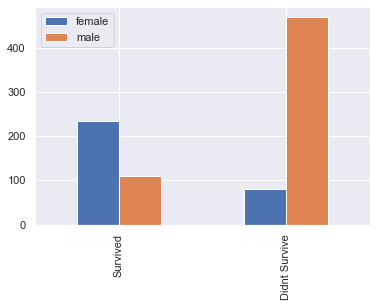

In [523]:
pd.DataFrame (get_field_subtotals ('Sex'),\
              index = ['Survived', 'Didn''t Survive'])\
.plot (kind = 'bar')

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from **list of series**

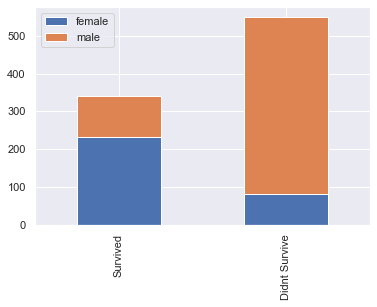

In [427]:
pd.DataFrame (get_field_subtotals ('Sex'), \
              index = ['Survived', 'Didn''t Survive']) \
.plot (kind = 'bar', stacked = 'True')

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from <font color = magenta><b>groupby.size.unstack</b></font>

**groupby on two fields**,
- the **first field** in the groupby clause is plotted on the **X-axis**
> this is the <font color = magenta><b>index</b></font> of the dataframe returned from unstack ()
- the **second field** in the groupby clause forms the **Y-axis**
> this is the <font color = magenta><b>unstacked feature</b></font> that forms columns in the dataframe returned from unstack ()

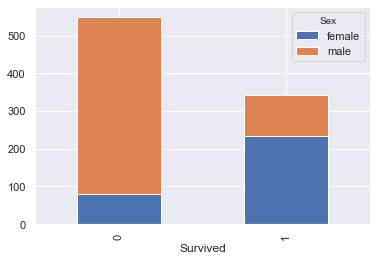

In [524]:
df_titanic_train.groupby (['Survived', 'Sex'])\
.size ().unstack ()\
.plot (kind = 'bar', stacked = True)

Define a helper function that plots the data frame.

In [525]:
def plot_stacked_bar_chart (df, l_fields):
    df.groupby (l_fields).size ().unstack ()\
    .plot (kind = 'bar', stacked = True)

example **usage**, plot 'Sex' stacked bar

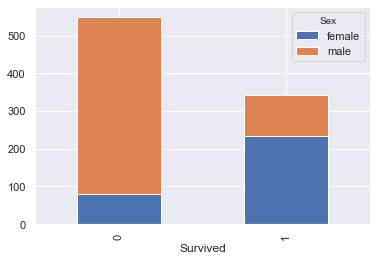

In [526]:
plot_stacked_bar_chart (df_titanic_train, ['Survived', 'Sex'])

example **usage**, plot 'Pclass' stacked bar

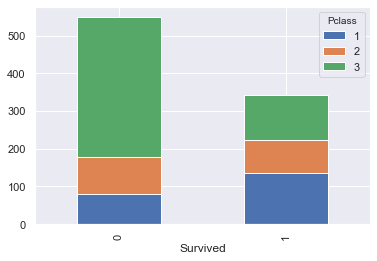

In [527]:
plot_stacked_bar_chart (df_titanic_train, ['Survived', 'Pclass'])

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from groupby.size.unstack (<font color = magenta><b>col_name</b></font>)

We mention **Survived** as the <font color = magenta><b>feature to be unstacked</b></font>.

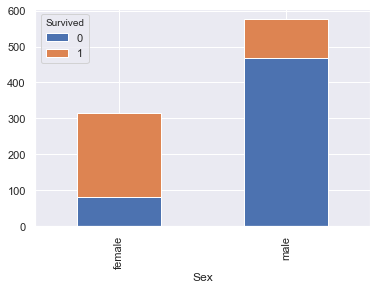

In [529]:
df_titanic_train.groupby (['Survived', 'Sex'])\
.size ().unstack ('Survived')\
.plot (kind = 'bar', stacked = True)

### Plot a PDF of 'Age', from the Survived and Not Survived groups.

**FacetGrid**
- dataframe
- 'hue' is the **depth** (**z-axis**)
- stretch using 'aspect'

**FacetGrid.map**
- KDE Plot described as **Kernel Density Estimate** is used for visualizing the Probability Density of a continuous variable. **y-axis**
- variable to be plotted - **x-axis**
- fill / shade



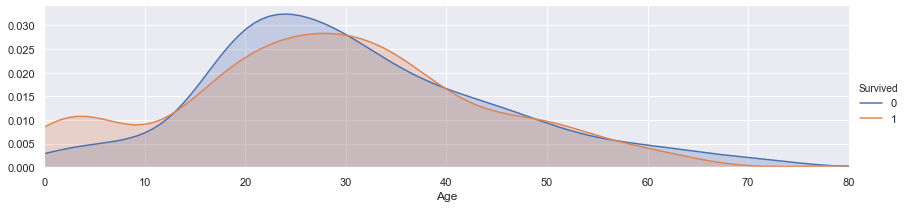

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set ()
facet = sns.FacetGrid (df_titanic_train, hue = 'Survived', aspect = 4)
facet.map (sns.kdeplot, 'Age', shade = True)
facet.set (xlim = (0, df_titanic_train ['Age'].max ()))
facet.add_legend ()
plt.show ()